In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None

    def fit(self, X):
        X = X - np.mean(X, axis=0)
        cov = np.cov(X.T)

        eigenvalues, eigenvectors = np.linalg.eig(cov)

        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        X = X - np.mean(X, axis=0)
        return np.dot(X, self.components.T)

Load Iris dataset

In [41]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)

Apply PCA

In [42]:
pca = PCA(2)
pca.fit(df.drop('class', axis=1).values)
X_transformed = pca.transform(df.drop('class', axis=1).values)

Visualize results

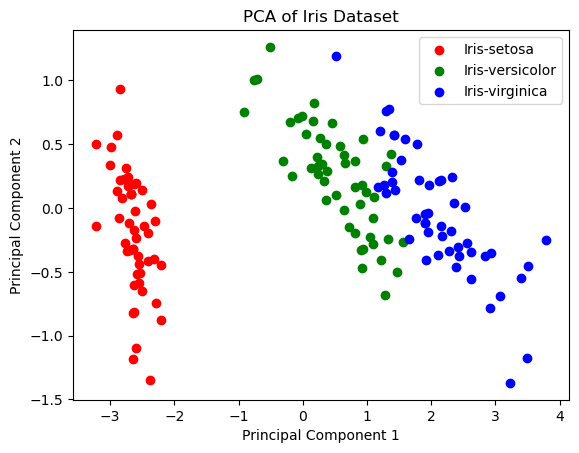

In [43]:
class_map = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}

for class_name, color in class_map.items():
    plt.scatter(X_transformed[df['class'] == class_name, 0], X_transformed[df['class'] == class_name, 1], c=color, label=class_name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()